### 다중클래스 분류 프로그램
- 심층신경망 사용 

In [100]:
import pandas as pd
import tensorflow as tf 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# data load 
data = pd.read_csv("winequality-white.csv", sep=';')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [101]:
data['quality'].value_counts()
# 0~11까지 예측하는 문제이지만 데이터는 3-9까지의 값만 존재함 
# 불균형 

#data['quality'] -= 3
data['quality'].value_counts()  # 0~6까지의 클래스로 변경

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


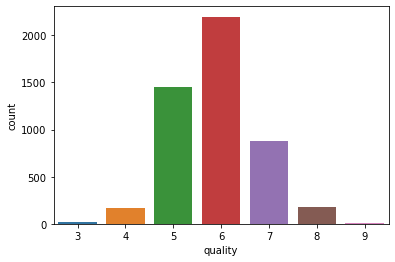

In [102]:
sns.countplot(data['quality'])  
# 7개 클래스만 존재 => 불균형 데이터 

In [103]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011E6EC35520>,
      dtype=object)

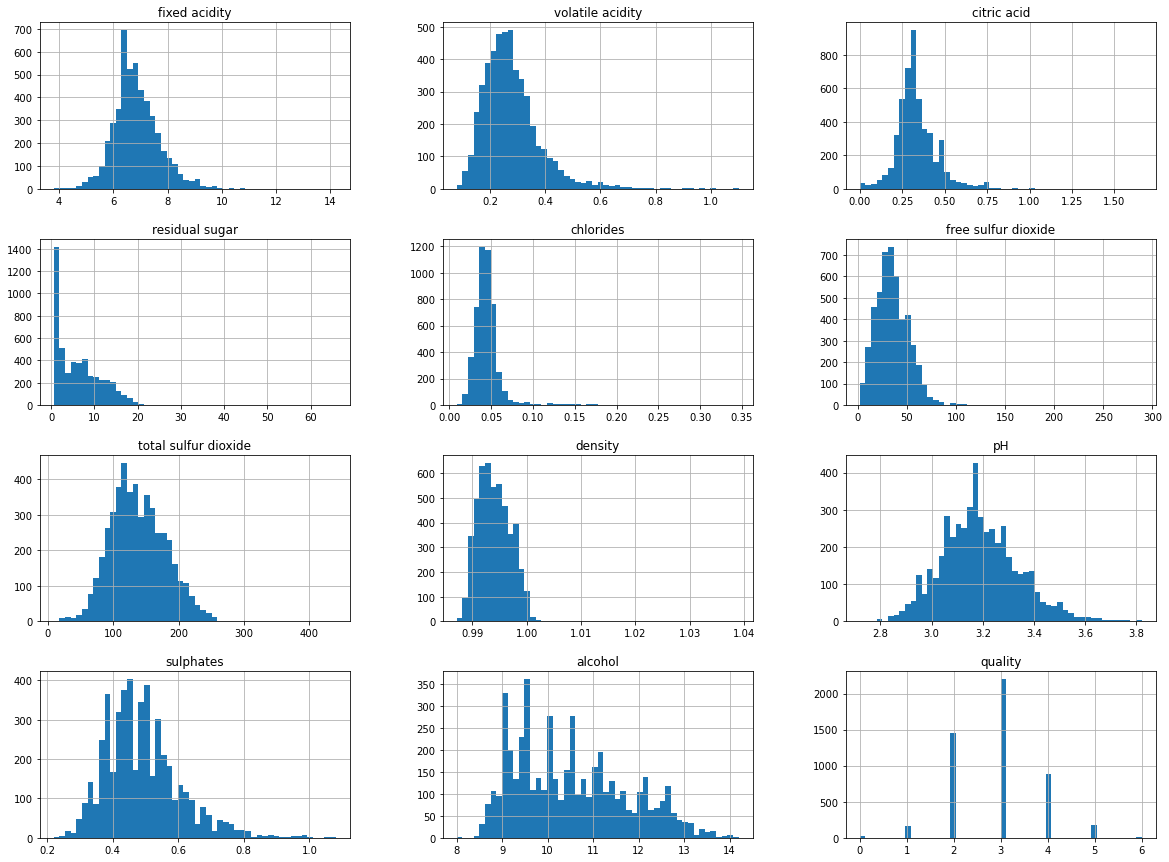

In [44]:
data.hist(bins=50, figsize=(20, 15))

In [104]:
# 특징, 정답 데이터 분리
feature_data = data.drop('quality', axis=1).copy()
label_data = data['quality'].copy()

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_data)
y = label_data

In [105]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

sm = SMOTE(k_neighbors=4)
X_resampled, y_resampled = sm.fit_sample(X_scaled, list(y))

X = pd.DataFrame(X_resampled, columns=feature_data.columns)
y = np.array(y_resampled)


c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


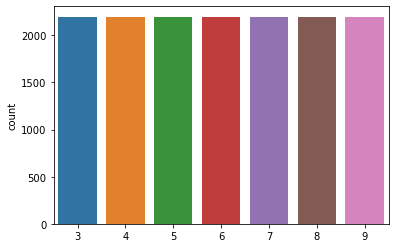

In [106]:
sns.countplot(y)

In [107]:
train_df = pd.DataFrame(X, columns=feature_data.columns)

In [108]:
train_df.shape 

(15386, 11)

In [109]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

In [111]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(12308, 11)
(12308,)
(3078, 11)
(3078,)


In [113]:
# 3-9클래스를 0-6클래스로 변환 
y_train -= 3
y_test -= 3


In [115]:
# 7개 클래스를 원핫인코딩
train_Y = tf.keras.utils.to_categorical(y_train, num_classes=7)  
test_Y = tf.keras.utils.to_categorical(y_test, num_classes=7)


In [118]:
train_Y.shape

(12308, 7)

In [119]:
# 케라스 다중 클래스 분류 모델 생성 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=X_train.shape[1])),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(128, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(32, activation='relu')),
model.add(tf.keras.layers.Dense(32, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(7, activation='softmax'))  # 0-6 클래스로 분류 


In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, train_Y, epochs=500, batch_size=100, validation_split=0.2, verbose=2)


Epoch 1/500
99/99 - 1s - loss: 1.9291 - accuracy: 0.1901 - val_loss: 1.8845 - val_accuracy: 0.3140 - 748ms/epoch - 8ms/step
Epoch 2/500
99/99 - 0s - loss: 1.8476 - accuracy: 0.2732 - val_loss: 1.7631 - val_accuracy: 0.3111 - 373ms/epoch - 4ms/step
Epoch 3/500
99/99 - 0s - loss: 1.7280 - accuracy: 0.3162 - val_loss: 1.6162 - val_accuracy: 0.3794 - 369ms/epoch - 4ms/step
Epoch 4/500
99/99 - 0s - loss: 1.6021 - accuracy: 0.3729 - val_loss: 1.4896 - val_accuracy: 0.4285 - 372ms/epoch - 4ms/step
Epoch 5/500
99/99 - 0s - loss: 1.5122 - accuracy: 0.4034 - val_loss: 1.3814 - val_accuracy: 0.4647 - 368ms/epoch - 4ms/step
Epoch 6/500
99/99 - 0s - loss: 1.4212 - accuracy: 0.4380 - val_loss: 1.2937 - val_accuracy: 0.4923 - 367ms/epoch - 4ms/step
Epoch 7/500
99/99 - 0s - loss: 1.3644 - accuracy: 0.4592 - val_loss: 1.2207 - val_accuracy: 0.5146 - 361ms/epoch - 4ms/step
Epoch 8/500
99/99 - 0s - loss: 1.3067 - accuracy: 0.4720 - val_loss: 1.1742 - val_accuracy: 0.5378 - 365ms/epoch - 4ms/step
Epoch 9/

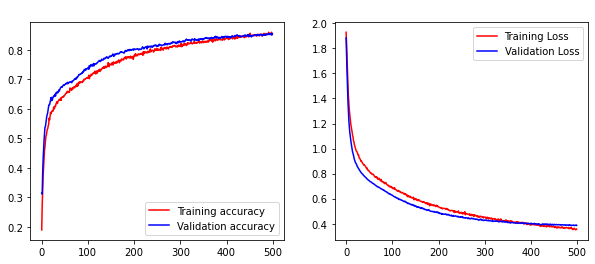

In [121]:
# 학습 과정 시각화
def plot_history():
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()


plot_history()


In [122]:
loss, acc = model.evaluate(X_test, test_Y)

97/97 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8635


In [129]:
# 예측 결과 
train_pred = model.predict(X_train)
test_pred =model.predict(X_test)

train_class = [np.argmax(y) for y in train_pred]
test_class = [np.argmax(y) for y in test_pred]


97/97 [==============================] - 0s 938us/step


In [131]:
print(pd.DataFrame((train_class == y_train)).value_counts())

print()
print(pd.DataFrame((test_class == y_test)).value_counts())


True     11069
False     1239
dtype: int64

True     2658
False     420
dtype: int64


In [152]:

print("train sample")
for i in range(7):
    train_error = np.sum(np.abs(train_class - y_train) == i)
    print(f"{i} : {train_error}")

print("test sample")
for i in range(7):
    test_error = np.sum(np.abs(test_class - y_test) == i)
    print(f"{i} : {test_error}")


train sample
0 : 11069
1 : 1145
2 : 91
3 : 3
4 : 0
5 : 0
6 : 0
test sample
0 : 2658
1 : 371
2 : 46
3 : 3
4 : 0
5 : 0
6 : 0
